#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [20]:
# Read CSV
import pandas as pd

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [21]:
duplicate = df[df.duplicated()]

if duplicate.empty:
    print("Tidak ada baris duplikat dalam dataset.")
else:
    print("Ada baris duplikat dalam dataset.")

Ada baris duplikat dalam dataset.


Periksa apakah ada missing values

In [22]:
missing_values = df.isnull().any()

if missing_values.any():
    print("Ada missing values dalam dataset.")
    print(missing_values[missing_values].index.tolist())
else:
    print("Tidak ada missing values dalam dataset.")

Tidak ada missing values dalam dataset.


Periksa outlier dengan boxplot untuk setiap kolom feature

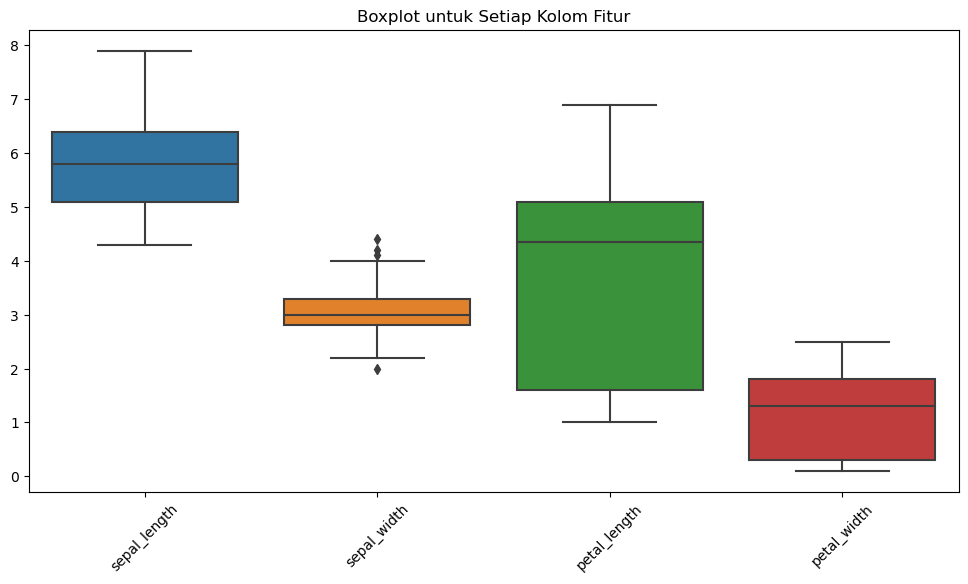

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v")
plt.title("Boxplot untuk Setiap Kolom Fitur")
plt.xticks(rotation=45)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [24]:
X = df.drop("species", axis=1)

y = df["species"]

print("Variabel Independen (Fitur):\n", X.head())
print("\nVariabel Dependen (Target):\n", y.head())

Variabel Independen (Fitur):
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Variabel Dependen (Target):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [25]:
X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Ukuran Dataset Train (X_train):", X_train.shape)
print("Ukuran Dataset Test (X_test):", X_test.shape)

Ukuran Dataset Train (X_train): (135, 4)
Ukuran Dataset Test (X_test): (15, 4)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Contoh data setelah fitur scaling (X_train_scaled):\n", X_train_scaled[:5])
print("\nContoh data setelah fitur scaling (X_test_scaled):\n", X_test_scaled[:5])

Contoh data setelah fitur scaling (X_train_scaled):
 [[ 0.56195149  0.56791065  0.51776964  0.51036026]
 [ 0.80278784 -0.12487192  1.14441016  1.30078436]
 [-0.28097574 -1.27950953  0.06203108 -0.1483265 ]
 [-0.16055757 -0.58672696  0.403835    0.1151482 ]
 [ 0.68236966 -0.58672696  1.03047552  1.30078436]]

Contoh data setelah fitur scaling (X_test_scaled):
 [[ 0.32111514 -0.58672696  0.51776964 -0.01658915]
 [-0.16055757  1.72254825 -1.19124995 -1.20222531]
 [ 2.24780595 -1.04858201  1.77105067  1.43252172]
 [ 0.20069696 -0.35579944  0.403835    0.37862291]
 [ 1.16404237 -0.58672696  0.57473696  0.24688555]]


#Logistic Regression

Bangun model dan ukur accuracy nya

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Logistic Regression:", accuracy)

Akurasi model Logistic Regression: 1.0


Uji model dengan dataset test

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Logistic Regression:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi model Logistic Regression: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Score: 1.0

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [30]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Koefisien (Bobot):", coefficients)
print("Intercept (Konstanta):", intercept)

Koefisien (Bobot): [[-1.06727817  1.15470126 -1.87975556 -1.7521319 ]
 [ 0.5339654  -0.27345873 -0.33791099 -0.78663818]
 [ 0.53331276 -0.88124253  2.21766655  2.53877008]]
Intercept (Konstanta): [-0.27453452  2.00482795 -1.73029343]


Uji hasil model dengan data test

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Logistic Regression pada data test:", accuracy)

print("\nClassification Report pada data test:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix pada data test:")
print(conf_matrix)

Akurasi model Logistic Regression pada data test: 1.0

Classification Report pada data test:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix pada data test:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes pada data test:", accuracy)

print("\nClassification Report pada data test:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix pada data test:")
print(conf_matrix)

Akurasi model Naive Bayes pada data test: 1.0

Classification Report pada data test:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix pada data test:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)

y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN pada data test:", accuracy)

print("\nClassification Report pada data test:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix pada data test:")
print(conf_matrix)

Akurasi model KNN pada data test: 1.0

Classification Report pada data test:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix pada data test:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


Uji model dengan data test

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN pada data test:", accuracy)

print("\nClassification Report pada data test:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix pada data test:")
print(conf_matrix)

Akurasi model KNN pada data test: 1.0

Classification Report pada data test:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Confusion Matrix pada data test:
[[6 0 0]
 [0 6 0]
 [0 0 3]]


Ukur akurasi dari model K-Nearest Neighbor

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN pada data test:", accuracy)

Akurasi model KNN pada data test: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah sama rata.